In [1]:
%pip install -r TrajVis/requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from TrajVis.components.balloon import Balloon
from TrajVis.components.network import Network
from TrajVis.components.networkanalyzer import NetworkAnalyzer as na
from TrajVis.components.plothelper import PlotHelper as ph
from TrajVis.components.windmap import WindMap as wm
from TrajVis.components.sample_antennas import *
from TrajVis.components.datahandler import DataHandler as dh
from antennas import *
import copy

import matplotlib.pyplot as plt

Balloon 1  popped at  6825.0
Balloon 1  hit the ground at time t= 9091.0
22.09965750233908 24.1923461248551


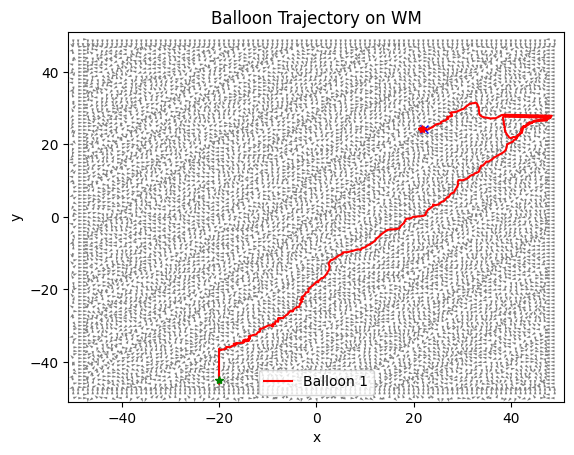

In [3]:
MyWindMap = wm(100, 100, 1)
MyWindMap.create_windmap()
MyWindMap.bound(4)

MyPlotHelper = ph(MyWindMap)
MyPlotHelper.populate(show_scale=False)

B1 = Balloon(MyWindMap, "Balloon 1", "red")
B1.set_start_pos(-20, -45)
tickResponse_1 = 1
while tickResponse_1:
    tickResponse_1 = B1.tick()

MyPlotHelper.plot_balloons(B1)

In [ ]:
MyWindMap = wm(500, 500, 1)
MyWindMap.create_windmap()
MyWindMap.bound(4)

MyPlotHelper = ph(MyWindMap)
MyPlotHelper.populate(show_scale=False)
# MyPlotHelper.plot(debug=False)

B1 = Balloon(MyWindMap, "1", "red")
B2 = Balloon(MyWindMap, "2", "blue")
B3 = Balloon(MyWindMap, "3", "green")
B4 = Balloon(MyWindMap, "4", "orange")
B5 = Balloon(MyWindMap, "5", "purple")
B6 = Balloon(MyWindMap, "6", "yellow")
B7 = Balloon(MyWindMap, "7", "pink")
B8 = Balloon(MyWindMap, "8", "black")

B1.set_start_pos(-20, -45)
B2.set_start_pos(-20, -48)
B3.set_start_pos(-21, -33)
B4.set_start_pos(-20, -38)
B5.set_start_pos(-20, -39)
B6.set_start_pos(-20, -40)
B7.set_start_pos(-20, -41)
B8.set_start_pos(-20, -42)

tickResponse_1 = 1
tickResponse_2 = 1
tickResponse_3 = 1
tickResponse_4 = 1
tickResponse_5 = 1
tickResponse_6 = 1
tickResponse_7 = 1
tickResponse_8 = 1

AntennaToUse = CPXband
B1.add_antenna(AntennaToUse)
B2.add_antenna(AntennaToUse)
B3.add_antenna(AntennaToUse)
B4.add_antenna(AntennaToUse)
B5.add_antenna(AntennaToUse)
B6.add_antenna(AntennaToUse)
B7.add_antenna(AntennaToUse)
B8.add_antenna(AntennaToUse)

# MyPlotHelper.plot_balloons(B1, B2, B3, B4, B5)
# MyPlotHelper.zoom_in(100, 100)

NA = na(B1, B2, B3, B4, B5)

MyNetwork = Network(B1,
                    B2,
                    B3,
                    B4,
                    B5,
                    B6,
                    B7,
                    B8,
                    start=B1,
                    end=B5,
                    generic_path=["1", "2", "3", "4", "5", "6", "7", "8"],)

while tickResponse_1:
    tickResponse_1 = B1.tick()
while tickResponse_2:
    tickResponse_2 = B2.tick()
while tickResponse_3:
    tickResponse_3 = B3.tick()
while tickResponse_4:
    tickResponse_4 = B4.tick()
while tickResponse_5:
    tickResponse_5 = B5.tick()
while tickResponse_6:
    tickResponse_6 = B6.tick()
while tickResponse_7:
    tickResponse_7 = B7.tick()
while tickResponse_8:
    tickResponse_8 = B8.tick()

1  popped at  6284.0
1  hit the ground at time t= 8548.0
2  popped at  6563.0
2  hit the ground at time t= 8827.0
3  popped at  7471.5
3  hit the ground at time t= 9734.5
4  popped at  7119.5
4  hit the ground at time t= 9382.5
5  popped at  6324.0
5  hit the ground at time t= 8589.0


In [9]:
reconfig_rp = []
generic_rp = []
reconfig_sensitivity = []
generic_sensitivity = []
ge_sensitivities_time = []
for i in range(1, 8000):
    MyNetwork.recalculate(i, NA.rp)
    MyNetwork.transmit(i, NA.rp)
    
    re_total_rp, re_sensitivity_test = MyNetwork.calculate_total_rp(i, NA.rp, path="Current")
    generic_total_rp, ge_sensitivity_test = MyNetwork.calculate_total_rp(i, NA.rp, path="Generic")
    
    reconfig_rp.append(re_total_rp)
    generic_rp.append(generic_total_rp)
    
    reconfig_sensitivity.append(re_sensitivity_test)
    if ge_sensitivity_test:
        generic_sensitivity.append(generic_total_rp)
        ge_sensitivities_time.append(i)
    
# NA.show_pointing(3500, B1, B2, B3, B4, B5, B6, B7, B8)

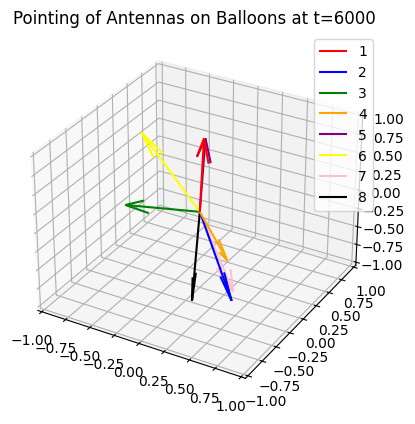

In [11]:
NA.show_pointing(6000, B1, B2, B3, B4, B5, B6, B7, B8)

7999 7999


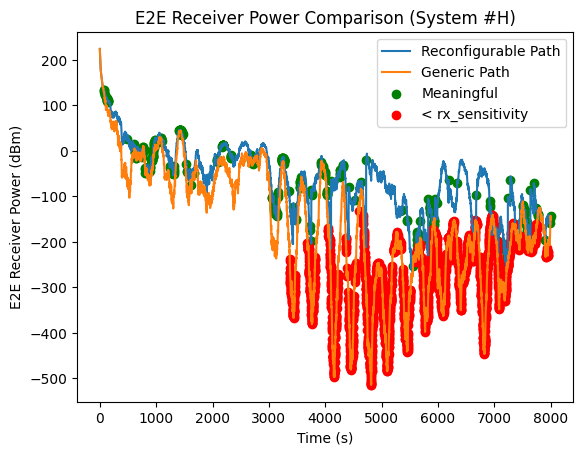

In [10]:
myDH = dh(MyNetwork)

print(len(reconfig_rp), len(generic_rp))

myDH.trp_comparison_to_csv(path1=reconfig_rp, path2=generic_rp, generic_sensitivities=[ge_sensitivities_time, generic_sensitivity], path1_name="Reconfigurable Path", path2_name="Generic Path", plot_meaningfuls=True, system="H")

myDH.plot_trp_comparison(path1=reconfig_rp, path2=generic_rp, generic_sensitivities=[ge_sensitivities_time, generic_sensitivity], path1_name="Reconfigurable Path", path2_name="Generic Path", plot_meaningfuls=True, system="H")

In [5]:
dr_reconfig = []
dr_generic = []
threshhold = 1000
for i in range(1,8000):
    MyNetwork.recalculate(i, NA.rp)
    MyNetwork.transmit(i, NA.rp)
    
    bitrate_reconfig = MyNetwork.data_rate_path(i, NA.data_rate, path="Current")
    bitrate_generic = MyNetwork.data_rate_path(i, NA.data_rate, path="Generic")
    
    # convert to mbps
    bitrate_reconfig = bitrate_reconfig / 1e6
    bitrate_generic = bitrate_generic / 1e6
    
    dr_reconfig.append(bitrate_reconfig)
    dr_generic.append(bitrate_generic)

c:\Users\Ali Mosallaei\Desktop\Desktop\MXL\trajectory-vis\functions\var_datarate.py:41: RuntimeWarning: invalid value encountered in log10
  Eb_N0_pred = C_N0 - 10 * np.log10(R_e)
c:\Users\Ali Mosallaei\Desktop\Desktop\MXL\trajectory-vis\functions\var_datarate.py:55: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  data_rate_solution = fsolve(margin_residual, initial_guess)


Average min. Data Rate for Reconfigurable Path: 91.87654957011026
Average min. Data Rate for Generic Path: 40.86446961647644


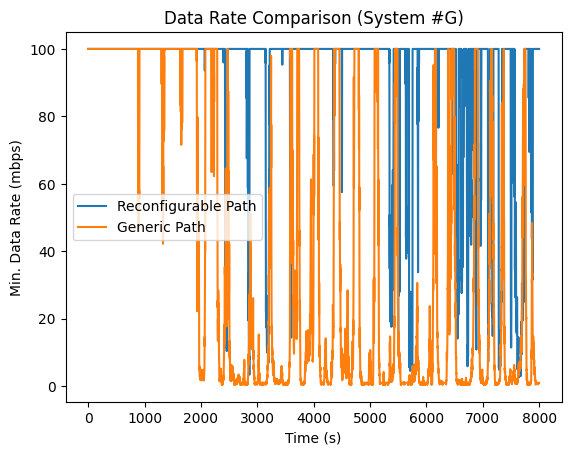

In [8]:
threshhold = 100
dr_reconfig_actual = copy.deepcopy(dr_reconfig)
dr_generic_actual = copy.deepcopy(dr_generic)
for i in range(0,len(dr_reconfig)):
    if dr_reconfig[i] >= threshhold:
        dr_reconfig[i] = threshhold
    if dr_generic[i] >= threshhold:
        dr_generic[i] = threshhold

plt.plot(range(1,8000), dr_reconfig, label="Reconfigurable Path")
plt.plot(range(1,8000), dr_generic, label="Generic Path")

plt.title("Data Rate Comparison (System #G)")
plt.xlabel("Time (s)")
plt.ylabel("Min. Data Rate (mbps)")

plt.legend()

print(f"Average min. Data Rate for Reconfigurable Path: {sum(dr_reconfig_actual)/len(dr_reconfig_actual)}")
print(f"Average min. Data Rate for Generic Path: {sum(dr_generic_actual)/len(dr_generic_actual)}")